In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

# ¿Es más factible presentar síntomas de Covid 19 por disminuir el uso del tapabocas, lavado manos y el tiempo en casa mientras Ómicron es la variante dominante en Uniandes?

## Para procurar responder esta pregunta con temas aprendidos en la clase de Introducción a la Ciencia de Datos se propuso obtener datos de una muestra de la población de Uniandes mediante una encuesta hecha a personas desconocidas en el campus con los cuidados de bioseguridad respectivos

## Dicha encuesta consta de las siguientes preguntas:

### 1. ¿Cada cuántas horas te lavas las manos aproximandamente en el 2022?
### 2. ¿Cuántos minutos al día tienes el tapabocas abajo estando fuera de casa aproximadamente en el 2022?
### 3. ¿Cuántas horas al día pasas fuera de casa entre semana aproximadamente en el 2022?
### 4. ¿Cuántas horas al día pasas fuera de casa los fines de semana aproximadamente en el 2022?
### 5. ¿Has tenido sintomas gripales como tos, dolor de garganta, cabeza y/o cuerpo durante el 2022 o prueba PCR positiva? (True=1/False=0)
### 6. ¿Has recibido por lo menos una dosis de alguna vacuna para el Covid 19? (True=1/False=0)

### Escribimos datos de la encuesta con las respuestas de los estudiantes uniandinos y un familiar por simplicidad aquí. Los datos tienen las siguientes abreviaciones de los nombres de columnas:

### 1. Periodo Lavado Manos (horas/lavado) = T$_{lav}$(horas/lav)
### 2. Tiempo sin tapabocas por día (minutos/dia) = t$_{sinTB}$(min/día)
### 3. Tiempo fuera de casa entre semana por día = t$_{EntSem}$(horas/día)
### 4. Tiempo fuera de casa los fines de semana por día = t$_{FinSem}$(horas/día)
### 5. Booleano de si ha tenido sintomas de covid en el 2022 cuando Omicron domina (True/False) = S(True/False)
### 6. Booleano de si ha recibido cuanto menos una vacuna para Covid 19 = V(True/False)



## Los datos de la encuesta a 19 personas (muestra "pequeña" en la población) cuyas columnas son las respuestas numéricas de las 6 preguntas en orden

In [37]:
#Etiquetas de las columnas de datos 
datosEti = ["T_lav(horas/lav)", "t_sinTB(min/día)", "t_EntSem(horas/día)", "t_FinSem(horas/día)", "S(True/False)", "V(True/False)" ]
#Datos de encuesta a 19 personas con las columnas en el orden de datosEti
datos = np.asarray([
        [4.0, 150.0, 10.0, 0.0, False, True],
        [2.5, 90.0, 8.0, 6.0, True, True ],
        [3.0, 110.0, 8.0, 3.0, True, True],
        [3.0, 80.0, 14.0, 6.0, False, True],
        [4.0, 100.0, 8.0, 3.0, False, True],
        [3.0, 150.0, 19.0, 5.0, False, True],
        [5.0, 120.0, 6.0, 1.0, False, True],
        [3.0, 120.0, 14.0, 10.0, True, True],
        [4.0, 120.0, 8.0, 10.0, False, True],
        [4.0, 240.0, 8.0, 12.0, False, True],
        [6.0, 240.0, 8.0, 8.0, True, True],
        [6.0, 240.0, 8.0, 8.0, False, True],
        [6.0, 300.0, 8.0, 8.0, False, True],
        [3.0, 240.0, 8.0, 10.0, False, True],
        [2.0, 240.0, 8.0, 6.0, True, True],
        [5.0, 240.0, 8.0, 8.0, True, True],
        [3.0, 5.0, 1.0, 1.0, True, True],
        [2.0, 20.0, 17.0, 17.0, False, True],
        [2.0, 45.0, 8.0, 1.5, False, True]        
        ])

#Imprimimos datos
print( datosEti ) 
for i in range( 0, 19 ): 
    print( "Persona #", i+1, ": ", datos[i] )
    
    

['T_lav(horas/lav)', 't_sinTB(min/día)', 't_EntSem(horas/día)', 't_FinSem(horas/día)', 'S(True/False)', 'V(True/False)']
Persona # 1 :  [  4. 150.  10.   0.   0.   1.]
Persona # 2 :  [ 2.5 90.   8.   6.   1.   1. ]
Persona # 3 :  [  3. 110.   8.   3.   1.   1.]
Persona # 4 :  [ 3. 80. 14.  6.  0.  1.]
Persona # 5 :  [  4. 100.   8.   3.   0.   1.]
Persona # 6 :  [  3. 150.  19.   5.   0.   1.]
Persona # 7 :  [  5. 120.   6.   1.   0.   1.]
Persona # 8 :  [  3. 120.  14.  10.   1.   1.]
Persona # 9 :  [  4. 120.   8.  10.   0.   1.]
Persona # 10 :  [  4. 240.   8.  12.   0.   1.]
Persona # 11 :  [  6. 240.   8.   8.   1.   1.]
Persona # 12 :  [  6. 240.   8.   8.   0.   1.]
Persona # 13 :  [  6. 300.   8.   8.   0.   1.]
Persona # 14 :  [  3. 240.   8.  10.   0.   1.]
Persona # 15 :  [  2. 240.   8.   6.   1.   1.]
Persona # 16 :  [  5. 240.   8.   8.   1.   1.]
Persona # 17 :  [3. 5. 1. 1. 1. 1.]
Persona # 18 :  [ 2. 20. 17. 17.  0.  1.]
Persona # 19 :  [ 2.  45.   8.   1.5  0.   1. ]


### Comentarios adicionales sobre estos datos de la encuesta:

### Como para las primeras 5 personas o filas en datos no se concoce si se han vacunado o no, se estima la fracción de estas 5 personas que se habrá vacuando a partir de los restantes 14 casos. Dicha probabilidad de haberse vacunado es P$_{vac}$ 14/14 = 1. Por ello parece razonable estiamar que las 5 personas se han vacunado.

### Persona # 7 mencionó el tiempo sin tapabocas t$_{sinTB}$ = 600.0 minutos. Más como no tiene sentido que sea mayor al tiempo fuera de casa entre semana se entiende que conto el tiempo de dormir sin tapabocas. Se acomoda con un valor estiamdo cercano al promedio t$_{sinTB}$ (Persona 7) = de 120.0 minutos

### Persona # 16 se mencionó el tiempo sin tapabocas con el tiempo de dormir, se ajusto al valor promedio de las personas con las que estaba de t$_{sinTB}$(Persona 16) = 240.0 min/día sin tapabocas

## Con esto en mente se producen por claridad arreglos con la información de cada pregunta, en el mismo orden así:

In [30]:
T_lav = datos[:, 0]
t_sinTB = datos[:, 1]
t_EntSem = datos[:, 2]
t_FinSem = datos[:, 3]
S = datos[:, 4] #S: sintomas de Covid 19, True/False
V = datos[:, 5] #V: Vacunado para Covid 19 con almenos 1 dosis, True/False

## Ahora, se observa el número de personas con sintomas sospechosos durante el 2022 cuando Omicrón ha sido la variante dominante:

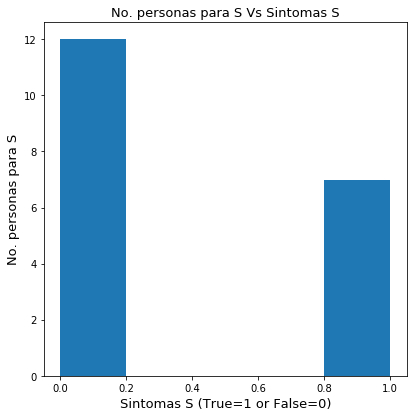

In [35]:
plt.figure( figsize=(6.5, 6.5) )
_ = plt.hist(S, bins=5)
plt.xlabel( r"Sintomas S (True=1 or False=0)", size=13 )
plt.ylabel( r"No. personas para S", size=13 )
plt.title( r"No. personas para S Vs Sintomas S", size=13 )
plt.show()

### Se aprecia en el histograma anterior que hay 12 personas sin sintomas y 8 con sisntomas en el 2022, para un total de 19 personas encuestadas. En este punto proponemos:

# la Hipotesis nula: Las distribuciones para personas con sintomas en 2022 $S=1 (True)$ y $S = 0 (False)$ siguen la misma distribución para las variables como lavado de manos T$_{lav}$, tiempo con tapabocas afuera t$_{SinTB}$ y tiempo fuera de casa entre semana t$_{EntSem}$ por día y los fines de semana t$_{FinSem}$ por día. 

## Dividamos los datos entre quienes tienen sintomas $S = 1 (True)$ y quienes no $S = 0 (False)$:

In [50]:
datosSTrue = np.asarray( [ 
                            datos[1,:],
                            datos[2,:],
                            datos[7,:],
                            datos[10,:],
                            datos[15,:]
    
                            ] )

### Distribución con Histogramas

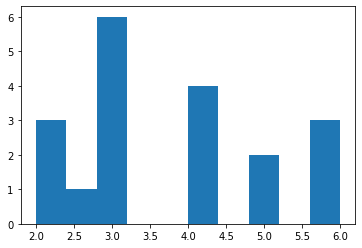

In [23]:
_ = plt.hist( T_lav, bins=10 )


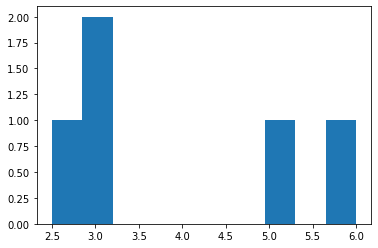

In [51]:
_ = plt.hist( datosSTrue[:,0] ) # Parte del histograma anterior con sintomas positivos

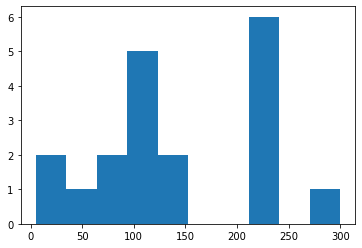

In [49]:
_ = plt.hist( t_sinTB, bins=10 )

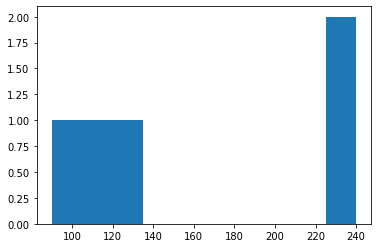

In [52]:
_ = plt.hist( datosSTrue[:,1] ) # Parte del histograma anterior con sintomas positivos

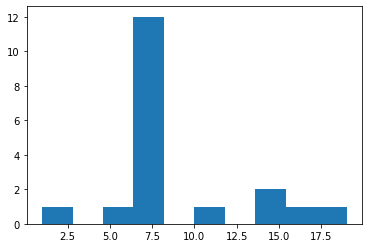

In [41]:
_ = plt.hist( t_EntSem, bins=10 )


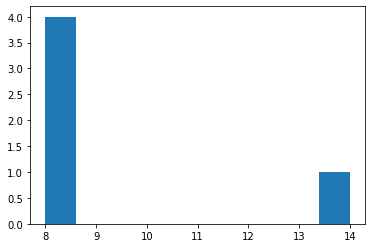

In [53]:
_ = plt.hist( datosSTrue[:,2] ) # Parte del histograma antererior con sintomas positivos

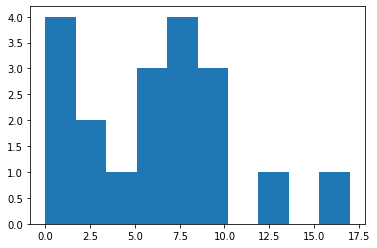

In [42]:
_ = plt.hist( t_FinSem, bins=10 )

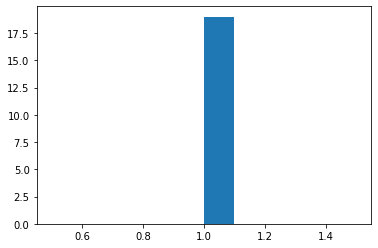

In [43]:
_ = plt.hist( V, bins=10 )

# Se observa cualitativamente que hay una dispersión/desviación estándar que es un porcentaje apreciable del valor promedio estimado con el máximo de los histogramas para las personas con sintomas ($S = 1 (True)$). Contrariamente es menor la dispersión/ desviación estándar de las personas sin sintomas que son el faltante de cada histograma. 

# Entonces, no siguen distribuciones similares las personas con sintomas $S = 1 (True)$ y las personas sin sintomas $S = 0 (False)$ pues es cualitativamente es diferente su dispersión (desviación estándar). De ahí, estar alejados del promedio en el periodo con que se lavan las manos T$_{lav}$, tiempo sin tapabocas afuera t$_{SinTB}$ y tiempo fuera de casa entre semana t$_{EntSem}$ se relaciona con una mayor posibilidad de contraer covid.

# Posiblemente esto se observa porque si estas debajo del promedio en estas varibales la persona se ha cuidado mucho y por primera vez contraen el virus, mientras que si estas por encima del promedio quizas las personas ya lo contrajeron y tienen cierta inmunidad pero se cuidan menos y terminan contrayendo Covid 19.

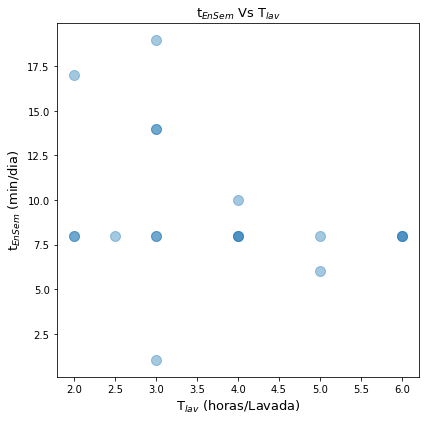

In [29]:
plt.figure( figsize=(6.5, 6.5) )
plt.scatter( T_lav, t_EnSem, alpha=0.4, s=100 )
plt.xlabel( r"T$_{lav}$ (horas/Lavada)", size=13 )
plt.ylabel( r"t$_{EnSem}$ (min/dia)", size=13 )
plt.title( r"t$_{EnSem}$ Vs T$_{lav}$", size=13 )
plt.show()

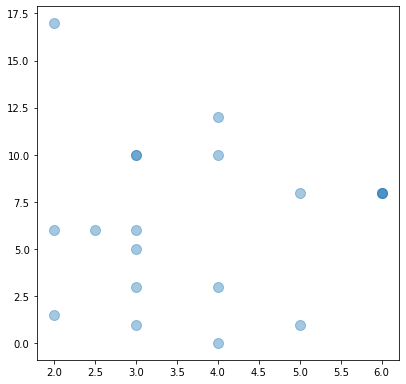

In [38]:
plt.figure( figsize=(6.5, 6.5) )
plt.scatter( T_lav, t_FinSem, alpha=0.4, s=100 )
plt.show()